Name: Weixuan (Ariel) Shao

UNI: ws2652

**Part 1: Data Download and Preprocessing**

**1. NOAA Local Climatological Data (LCD)**



In [ ]:
# Dataset: NOAA Local Climatological Data (LCD) from a Tennessee airport station

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/content/3979265.csv'
df = pd.read_csv(file_path)

# Show basic info
print("Basic Info:")
df.info()

# Preview the data
print("\nFirst few rows:")
display(df.head())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38655 entries, 0 to 38654
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    38655 non-null  object 
 1   NAME                       38655 non-null  object 
 2   LATITUDE                   38655 non-null  float64
 3   LONGITUDE                  38655 non-null  float64
 4   ELEVATION                  38655 non-null  float64
 5   DATE                       38655 non-null  object 
 6   REPORT_TYPE                38655 non-null  object 
 7   SOURCE                     37523 non-null  float64
 8   HourlyDewPointTemperature  37500 non-null  float64
 9   HourlyDryBulbTemperature   37510 non-null  float64
 10  HourlyPrecipitation        28373 non-null  object 
 11  HourlyPressureChange       14543 non-null  float64
 12  HourlyPressureTendency     14543 non-null  float64
 13  HourlyRelativeHumidity     37499 n

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,REPORT_TYPE,SOURCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindSpeed
0,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01T00:00:00,SOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01T00:00:00,SOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01T00:06:00,FM-16,343.0,63.0,64.0,NaN,NaN,NaN,96.0,NaN,29.14,63.0,6.0
3,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01T00:15:00,FM-16,343.0,64.0,66.0,NaN,NaN,NaN,93.0,NaN,29.14,65.0,7.0
4,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01T00:41:00,FM-16,343.0,64.0,66.0,NaN,NaN,NaN,93.0,NaN,29.13,65.0,5.0


In [ ]:
# Convert date column
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Clean column names
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

In [ ]:
# Total number of rows
print(f"Total rows in dataset: {len(df)}")

# Missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# Display rows with missing values
problem_rows = df[df.isnull().any(axis=1)]
print(f"\nRows with missing data: {len(problem_rows)}")
problem_rows.head()

Total rows in dataset: 38655

Missing values per column:
STATION                          0
NAME                             0
LATITUDE                         0
LONGITUDE                        0
ELEVATION                        0
DATE                             0
REPORT_TYPE                      0
SOURCE                        1132
HourlyDewPointTemperature     1155
HourlyDryBulbTemperature      1145
HourlyPrecipitation          10282
HourlyPressureChange         24112
HourlyPressureTendency       24112
HourlyRelativeHumidity        1156
HourlySeaLevelPressure        6630
HourlyStationPressure         1361
HourlyWetBulbTemperature      1385
HourlyWindSpeed               1169
dtype: int64

Rows with missing data: 30054


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,REPORT_TYPE,SOURCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyWetBulbTemperature,HourlyWindSpeed
0,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01 00:00:00,SOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01 00:00:00,SOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01 00:06:00,FM-16,343.0,63.0,64.0,NaN,NaN,NaN,96.0,NaN,29.14,63.0,6.0
3,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01 00:15:00,FM-16,343.0,64.0,66.0,NaN,NaN,NaN,93.0,NaN,29.14,65.0,7.0
4,USW00013882,"CHATTANOOGA AIRPORT, TN US",35.03362,-85.20044,204.2,2022-01-01 00:41:00,FM-16,343.0,64.0,66.0,NaN,NaN,NaN,93.0,NaN,29.13,65.0,5.0


In [ ]:
# Replace 'T' with 0.001 and convert to float
if 'HourlyPrecipitation' in df.columns:
    df['HourlyPrecipitation'] = df['HourlyPrecipitation'].astype(str).str.strip()
    trace_count = df['HourlyPrecipitation'].str.upper().str.contains('T').sum()
    print(f"\nTrace ('T') values in HourlyPrecipitation: {trace_count}")

    df['HourlyPrecipitation'] = df['HourlyPrecipitation'].replace('T', 0.001)
    df['HourlyPrecipitation'] = pd.to_numeric(df['HourlyPrecipitation'], errors='coerce')


Trace ('T') values in HourlyPrecipitation: 1982


In [ ]:
# Function to detect outliers
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

# Expanded set of numeric columns
numeric_cols = [
    'HourlyPrecipitation',
    'HourlyDryBulbTemperature',
    'HourlyDewPointTemperature',
    'HourlyWetBulbTemperature',
    'HourlyRelativeHumidity',
    'HourlyPressureChange',
    'HourlyPressureTendency',
    'HourlyStationPressure',
    'HourlySeaLevelPressure',
    'HourlyWindSpeed'
]

# Detect outliers in each numeric column
for col in numeric_cols:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        outliers = detect_outliers_iqr(df[col].dropna())
        print(f"{col}: {len(outliers)} outliers detected")

HourlyPrecipitation: 5176 outliers detected
HourlyDryBulbTemperature: 54 outliers detected
HourlyDewPointTemperature: 23 outliers detected
HourlyWetBulbTemperature: 61 outliers detected
HourlyRelativeHumidity: 0 outliers detected
HourlyPressureChange: 245 outliers detected
HourlyPressureTendency: 0 outliers detected
HourlyStationPressure: 745 outliers detected
HourlySeaLevelPressure: 713 outliers detected
HourlyWindSpeed: 184 outliers detected


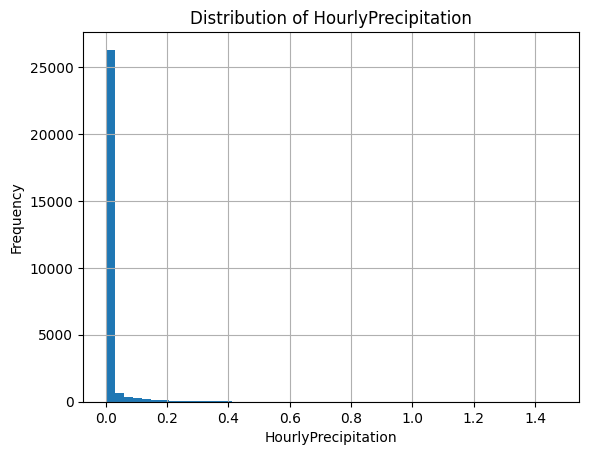

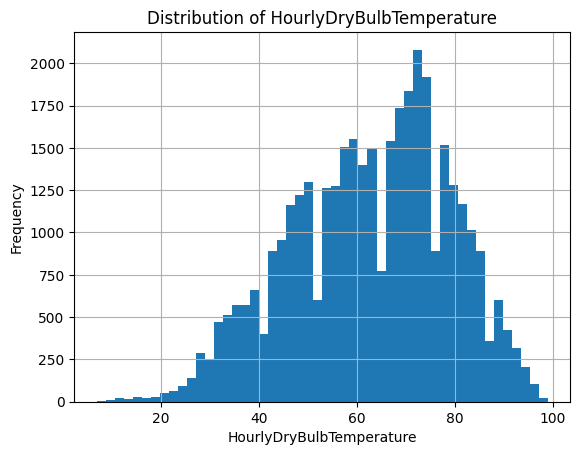

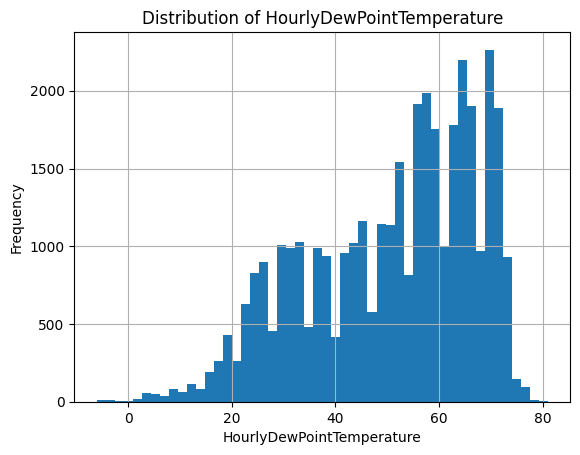

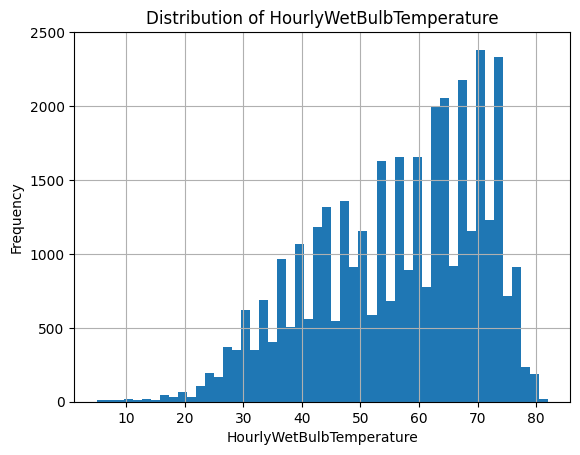

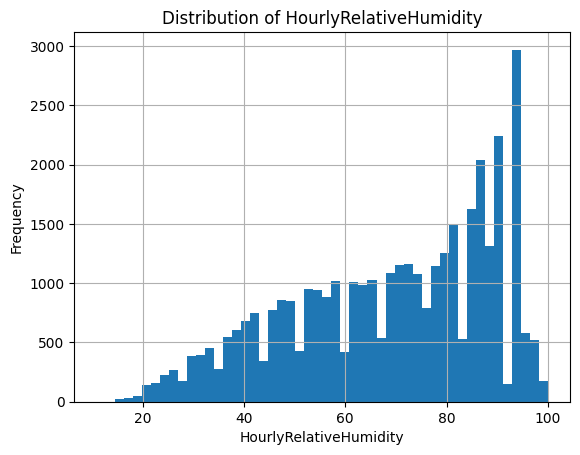

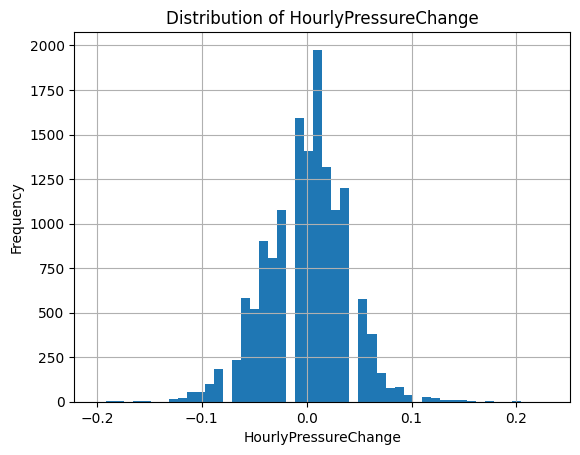

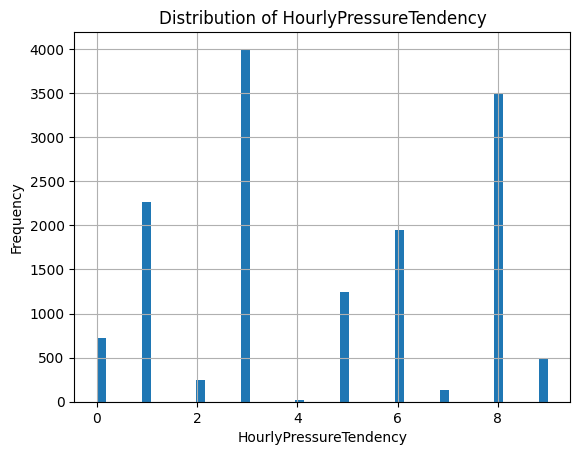

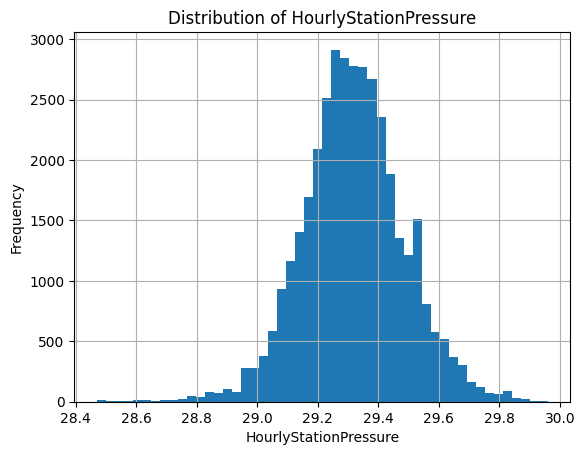

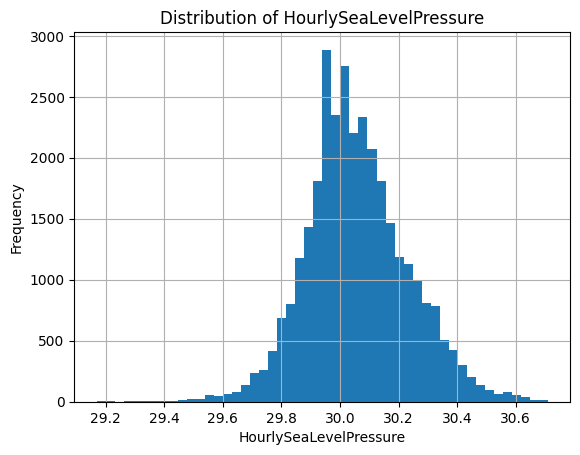

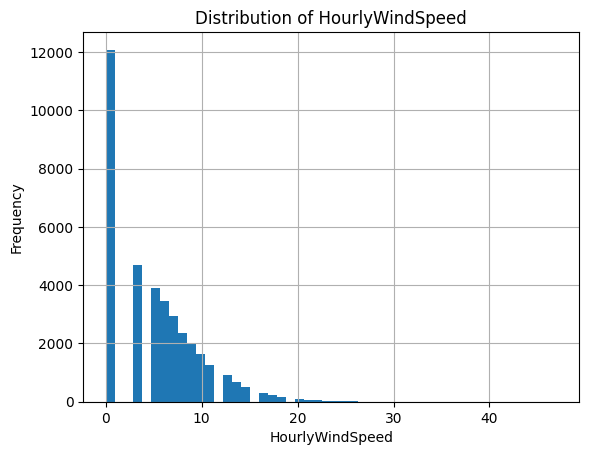

In [ ]:
# Plot histograms for each variable
for col in numeric_cols:
    if col in df.columns:
        plt.figure()
        try:
            df[col].dropna().astype(float).hist(bins=50)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
        except Exception as e:
            print(f"Could not plot {col}: {e}")

In [ ]:
total_rows = len(df)
missing_rows = len(problem_rows)
print(f"\nSummary:")
print(f"Total observations: {total_rows}")
print(f"Rows with missing values: {missing_rows} ({missing_rows / total_rows:.2%})")
print(f"Trace precipitation values handled: {trace_count}")


Summary:
Total observations: 38655
Rows with missing values: 30054 (77.75%)
Trace precipitation values handled: 1982


In [ ]:
df.to_csv("LCD_cleaned.csv", index=False)
print("✅ Cleaned LCD data saved as LCD_cleaned.csv")

✅ Cleaned LCD data saved as LCD_cleaned.csv


**2. ERA5 Reanalysis Data**

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
from cfgrib import open_datasets

# File paths for your 3 ERA5 GRIB files (adjust if needed)
grib_files = [
    "/content/ERA5-2022",
    "/content/ERA5-2023",
    "/content/ERA5-2024"
]

# This will hold the processed DataFrames for each year
all_years_df = []

# Merge function that drops problem metadata
def merge_df(master_df, new_ds, var_name, transform_fn=None):
    df_new = new_ds[[var_name]].to_dataframe().reset_index()
    df_new = df_new.drop(columns=[col for col in ['number', 'step', 'surface', 'valid_time'] if col in df_new.columns])
    if transform_fn:
        df_new[var_name] = transform_fn(df_new[var_name])
    return df_new if master_df is None else pd.merge(master_df, df_new, on=['time', 'latitude', 'longitude'], how='outer')

# Loop through all GRIB files and extract variables
for grib_path in grib_files:
    datasets = open_datasets(grib_path)
    ds_dict = {}
    for ds in datasets:
        for var in ds.data_vars:
            ds_dict[var] = ds

    df = None
    if "t2m" in ds_dict:
        df = merge_df(df, ds_dict["t2m"], "t2m", lambda x: x - 273.15)
    if "d2m" in ds_dict:
        df = merge_df(df, ds_dict["d2m"], "d2m", lambda x: x - 273.15)
    if "msl" in ds_dict:
        df = merge_df(df, ds_dict["msl"], "msl", lambda x: x / 100)
    if "tp" in ds_dict:
        df = merge_df(df, ds_dict["tp"], "tp", lambda x: x * 1000)
    if "u10" in ds_dict:
        df = merge_df(df, ds_dict["u10"], "u10")
    if "v10" in ds_dict:
        df = merge_df(df, ds_dict["v10"], "v10")

    if df is not None and "u10" in df.columns and "v10" in df.columns:
        df["wind_speed"] = np.sqrt(df["u10"]**2 + df["v10"]**2)

    all_years_df.append(df)

# Combine all years and save
df_all_years = pd.concat(all_years_df).sort_values("time").reset_index(drop=True)
df_all_years.to_csv("ERA5_2022_2024_combined.csv", index=False)
print("✅ CSV saved as ERA5_2022_2024_combined.csv")


/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr/local/lib/python3.11/dist-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/usr

✅ CSV saved as ERA5_2022_2024_combined.csv


In [ ]:
from google.colab import files
files.download("ERA5_2022_2024_combined.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**3. Data Preparation**

In [ ]:
import pandas as pd
import numpy as np

# Load your uploaded file
df = pd.read_csv("ERA5_2022_2024_combined.csv", parse_dates=["time"])

# Step 1: Rename variables to unify schema
df = df.rename(columns={
    "t2m": "temperature",
    "d2m": "dewpoint",
    "tp": "precipitation",
    "msl": "pressure"
})

# Step 2: Convert UTC to US Eastern (Chattanooga time zone)
df["time_local"] = df["time"].dt.tz_localize("UTC").dt.tz_convert("America/New_York")

# Step 3: Feature engineering
## 3-hour future precipitation as prediction target
df["precip_3h_future"] = df["precipitation"].shift(-3)

## Moving averages
df["temp_ma_24h"] = df["temperature"].rolling(window=24).mean()
df["temp_ma_5d"] = df["temperature"].rolling(window=24*5).mean()

## Cloudburst binary indicator
df["cloudburst"] = (df["precipitation"] >= 100).astype(int)

# Step 4: Drop NaNs introduced from shifting/rolling
df = df.dropna().reset_index(drop=True)

# Step 5: Train/test split (80/20)
split = int(0.8 * len(df))
df_train = df.iloc[:split]
df_test = df.iloc[split:]

# Save locally in Colab
df_train.to_csv("ERA5_train_prepared.csv", index=False)
df_test.to_csv("ERA5_test_prepared.csv", index=False)

print("✅ Data preparation complete. Files saved:")
print("- ERA5_train_prepared.csv")
print("- ERA5_test_prepared.csv")

✅ Data preparation complete. Files saved:
- ERA5_train_prepared.csv
- ERA5_test_prepared.csv


**Part 2: Exploratory Data Analysis**

**1. Statistical Comparison**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load ERA5
era5 = pd.read_csv("ERA5_train_prepared.csv", parse_dates=["time_local"])

# Load NOAA LCD
lcd = pd.read_csv("LCD_cleaned.csv", parse_dates=["time_local"])

In [ ]:
# Rename LCD columns to match ERA5
lcd = lcd.rename(columns={
    "HourlyPrecipitation": "precipitation",
    "HourlyDryBulbTemperature": "temperature",
    "HourlySeaLevelPressure": "pressure",
    "DATE": "time_local"
})

# Keep only necessary columns and drop missing values
lcd = lcd[["time_local", "precipitation", "temperature", "pressure"]].dropna()
era5_subset = era5[["time_local", "precipitation", "temperature", "pressure"]]

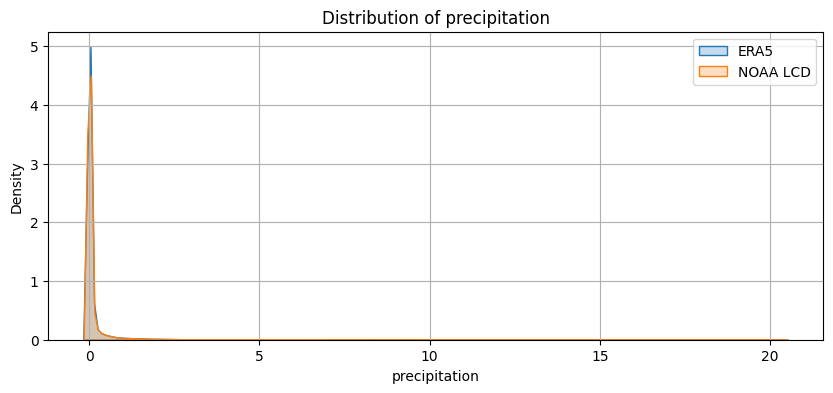

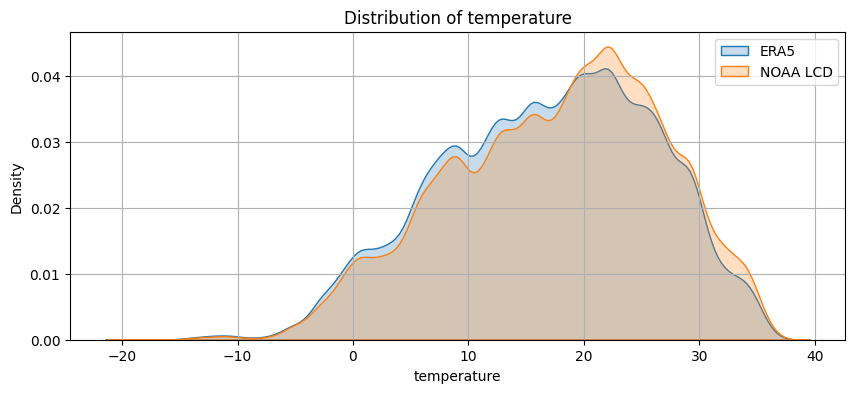

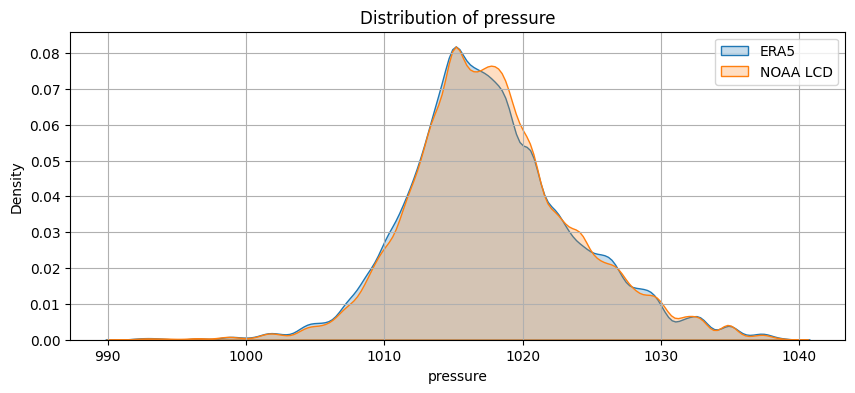

In [ ]:
# Compare Distributions
# Plot histograms side-by-side
variables = ["precipitation", "temperature", "pressure"]
for var in variables:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(era5_subset[var], label="ERA5", fill=True)
    sns.kdeplot(lcd[var], label="NOAA LCD", fill=True)
    plt.title(f"Distribution of {var}")
    plt.legend()
    plt.grid(True)
    plt.show()

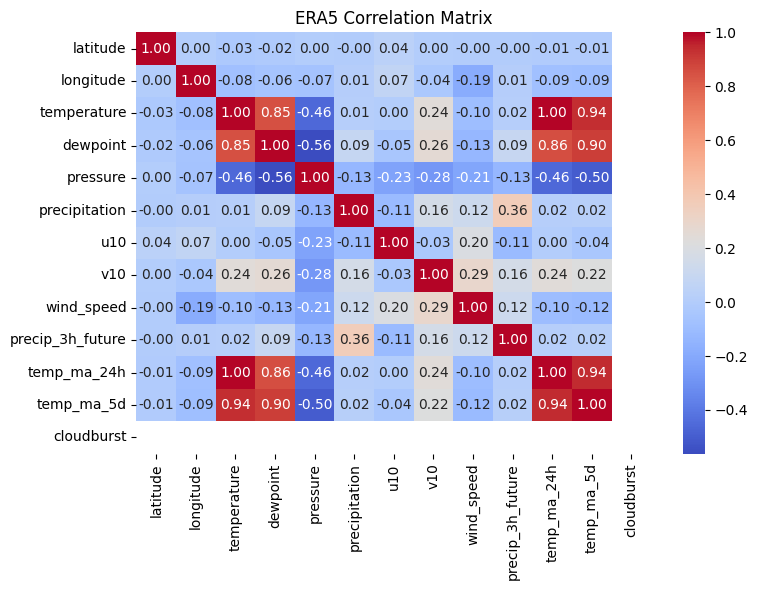

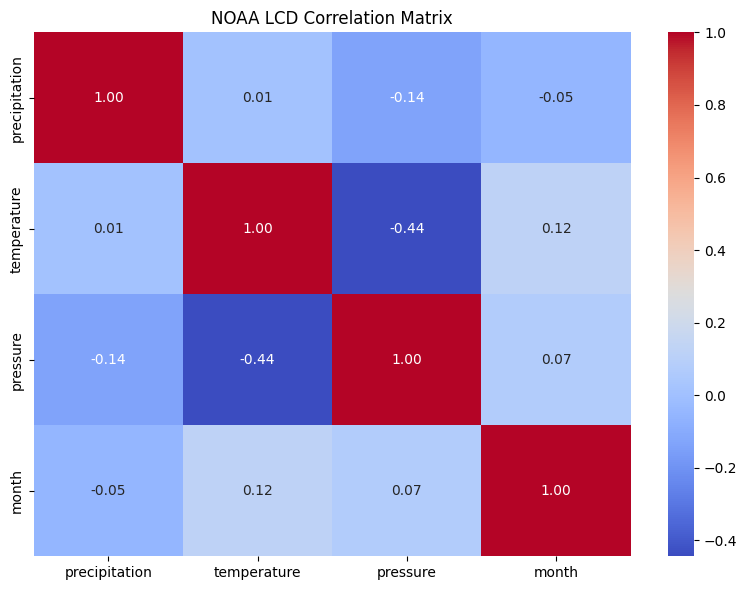

In [ ]:
# Correlation Matrices
# Drop non-numeric columns before computing correlations
era5_corr = era5.select_dtypes(include='number').corr()
lcd_corr = lcd.select_dtypes(include='number').corr()

# Plot correlation heatmaps
plt.figure(figsize=(8, 6))
sns.heatmap(era5_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("ERA5 Correlation Matrix")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(lcd_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("NOAA LCD Correlation Matrix")
plt.tight_layout()
plt.show()

<ipython-input-65-c292a0ce1439>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era5_subset["time_local"] = pd.to_datetime(era5_subset["time_local"], errors='coerce')
<ipython-input-65-c292a0ce1439>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  era5_subset["month"] = era5_subset["time_local"].dt.month


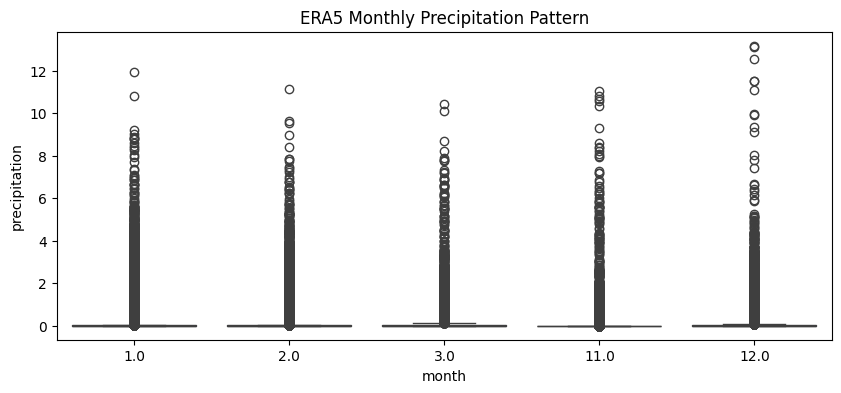

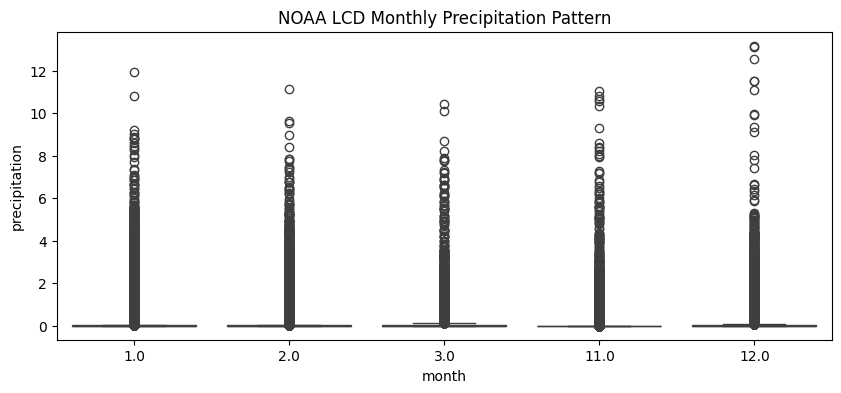

In [ ]:
# Seasonal Patterns in Precipitation
# Ensure datetime format
era5_subset["time_local"] = pd.to_datetime(era5_subset["time_local"], errors='coerce')
lcd["time_local"] = pd.to_datetime(lcd["time_local"], errors='coerce')

# Extract month from time
era5_subset["month"] = era5_subset["time_local"].dt.month
lcd["month"] = lcd["time_local"].dt.month

# Boxplots of precipitation by month
plt.figure(figsize=(10, 4))
sns.boxplot(x="month", y="precipitation", data=era5_subset)
plt.title("ERA5 Monthly Precipitation Pattern")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x="month", y="precipitation", data=lcd)
plt.title("NOAA LCD Monthly Precipitation Pattern")
plt.show()

*1. Statistical Comparison*

**Distributions (Precipitation, Pressure, Temperature)**:

a. Precipitation: Both NOAA LCD and ERA5 show highly right-skewed distributions with the majority of values near 0, but ERA5 has slightly more spread in extremes.

b. Temperature: The two datasets are quite aligned in shape, though NOAA LCD seems to have slightly higher densities at peak temperature ranges.

c. Pressure: The distributions of pressure are also similar, with NOAA LCD showing a slight shift toward lower pressure during extreme precipitation events.

**Correlation Matrices:**

a. ERA5: Shows strong correlations between temperature and dewpoint, as well as temperature with moving averages. Precipitation has moderate negative correlation with pressure and weak positive correlation with future precipitation.

b. NOAA LCD: Simpler correlation matrix (fewer features), but similar pattern: negative correlation between pressure and precipitation, and moderate temperature relationships.

**Key Differences Between ERA5 & NOAA LCD:**

a. ERA5 has richer features and more engineered variables (e.g., u10, v10, moving averages).

b. NOAA LCD is more conservative and direct (fewer variables), likely due to being actual observational data.

c. ERA5's correlations are more extensive due to these derived features.

**Seasonal Patterns in Precipitation:**

a. Monthly boxplots show clear seasonal effects in both datasets with higher precipitation during summer months and occasional spikes in winter.

b. Pattern is consistent between ERA5 and NOAA LCD, suggesting both capture seasonality well.

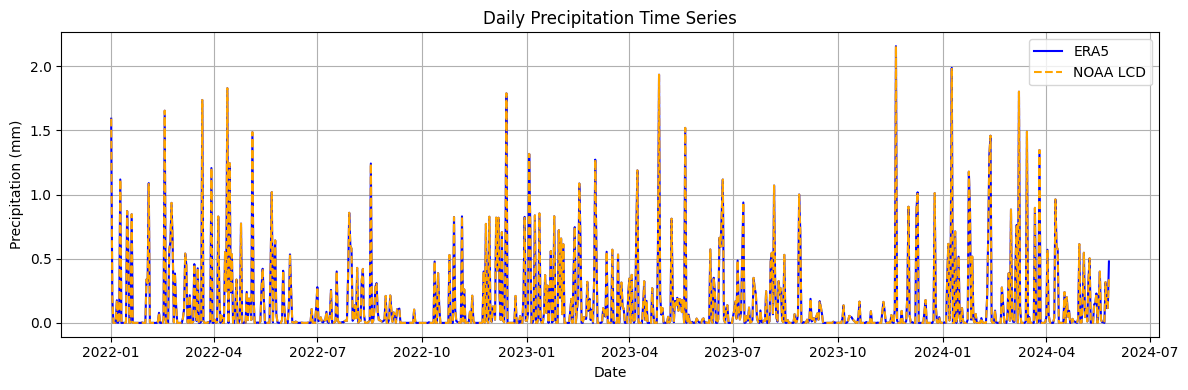

In [ ]:
# Step 1: Ensure datetime index
era5_subset["time_local"] = pd.to_datetime(era5_subset["time_local"], utc=True)
lcd["time_local"] = pd.to_datetime(lcd["time_local"], utc=True)

# Step 2: Remove timezone (optional for plotting/resampling)
era5_subset["time_local"] = era5_subset["time_local"].dt.tz_localize(None)
lcd["time_local"] = lcd["time_local"].dt.tz_localize(None)

# Step 3: Set index and downsample to daily average
era5_daily = era5_subset.set_index("time_local").resample("D").mean(numeric_only=True)
lcd_daily = lcd.set_index("time_local").resample("D").mean(numeric_only=True)

# Step 4: Find overlapping date range
common_start = max(era5_daily.index.min(), lcd_daily.index.min())
common_end = min(era5_daily.index.max(), lcd_daily.index.max())

# Step 5: Plot
plt.figure(figsize=(12, 4))
plt.plot(era5_daily.loc[common_start:common_end].index,
         era5_daily.loc[common_start:common_end]["precipitation"],
         label="ERA5", color="blue", linewidth=1.5, linestyle="-")

plt.plot(lcd_daily.loc[common_start:common_end].index,
         lcd_daily.loc[common_start:common_end]["precipitation"],
         label="NOAA LCD", color="orange", linewidth=1.5, linestyle="--")

plt.title("Daily Precipitation Time Series")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


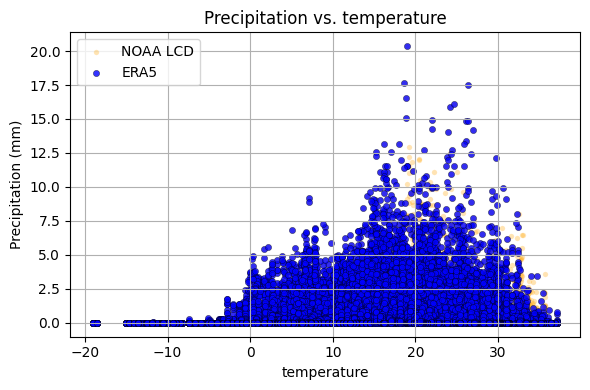

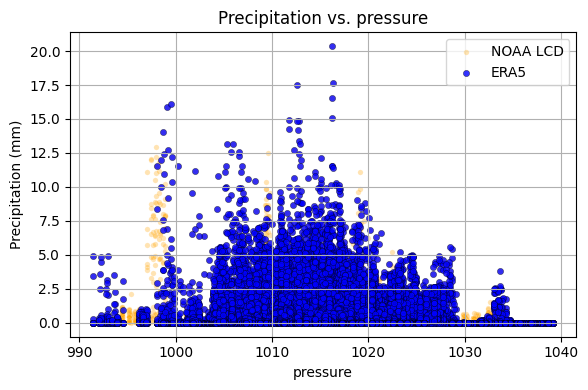

In [ ]:
# Scatterplots of Predictors vs. Precipitation (Improved visibility)
predictors = ["temperature", "pressure"]
for var in predictors:
    plt.figure(figsize=(6, 4))

    # Plot NOAA LCD first (so ERA5 overlays on top)
    sns.scatterplot(
        x=lcd[var], y=lcd["precipitation"],
        label="NOAA LCD", color="orange", alpha=0.3, s=15
    )

    # Plot ERA5 second with higher opacity and edge for visibility
    sns.scatterplot(
        x=era5_subset[var], y=era5_subset["precipitation"],
        label="ERA5", color="blue", alpha=0.8, s=20, edgecolor="black", linewidth=0.3
    )

    plt.title(f"Precipitation vs. {var}")
    plt.xlabel(var)
    plt.ylabel("Precipitation (mm)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


***2. Visualization***

**Time Series of Precipitation:**

a. Time series plots show distinct seasonal precipitation spikes. Interestingly, NOAA LCD data shows much clearer temporal precipitation patterns; ERA5 may be smoothed or has missing chunks in the current plot.

**Precipitation vs Predictor Variables:**

a. Temperature: Precipitation seems to increase with temperature up to a point (~25°C), then decline—suggesting convective rainfall behavior.

b. Pressure: As expected, lower pressure is loosely associated with higher precipitation (common in storm systems). Both datasets show this.

**Part 3: Model Development**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

**1. Precipitation Prediction Models**


 ERA5 - Linear Regression:
MAE: 0.2567925461783868
RMSE: 0.609193235656989
R²: 0.050573670420034245

 ERA5 - Random Forest:
MAE: 0.1345544169115541
RMSE: 0.4789931475035582
R²: 0.4130383491667088


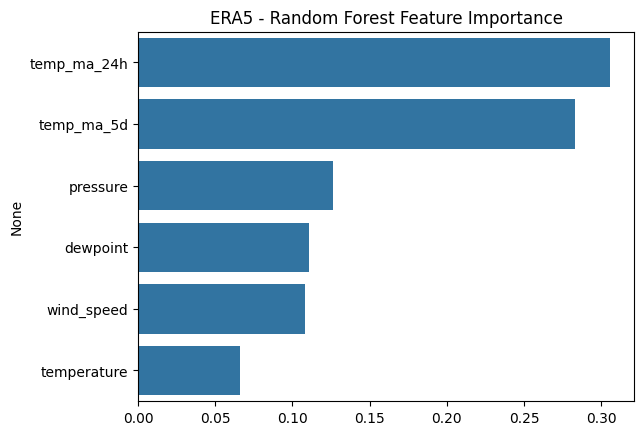


 NOAA LCD - Linear Regression:
MAE: 0.24670144434573266
RMSE: 0.6164187289689514
R²: 0.051868734075473766

 NOAA LCD - Random Forest:
MAE: 0.13370618062270564
RMSE: 0.4840538840596074
R²: 0.4153388512951811


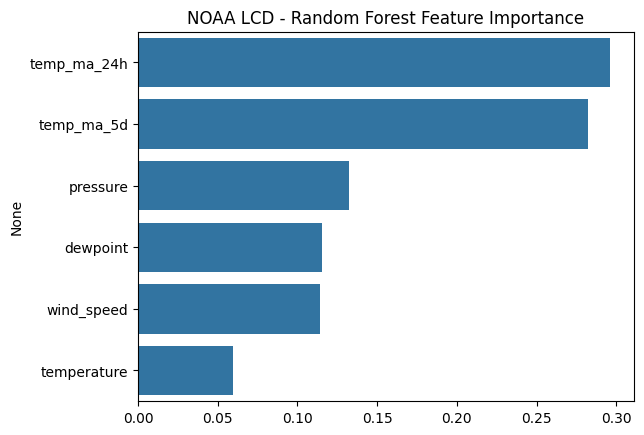

In [ ]:
# Load datasets
era5 = pd.read_csv("ERA5_train_prepared.csv", parse_dates=["time_local"])
lcd = pd.read_csv("LCD_cleaned.csv", parse_dates=["time_local"])

# Choose features
features = ['temperature', 'dewpoint', 'pressure', 'wind_speed', 'temp_ma_24h', 'temp_ma_5d']
target = 'precip_3h_future'

# Helper to train and evaluate regression models
def run_regression_models(df, label):
    df = df.dropna(subset=features + [target])
    X = df[features]
    y = df[target]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)

    # Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    # Metrics
    print(f"\n {label} - Linear Regression:")
    print("MAE:", mean_absolute_error(y_test, y_pred_lr))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
    print("R²:", r2_score(y_test, y_pred_lr))

    print(f"\n {label} - Random Forest:")
    print("MAE:", mean_absolute_error(y_test, y_pred_rf))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
    print("R²:", r2_score(y_test, y_pred_rf))

    # Feature importance
    importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
    sns.barplot(x=importances.values, y=importances.index)
    plt.title(f"{label} - Random Forest Feature Importance")
    plt.show()

# Run
run_regression_models(era5, "ERA5")
run_regression_models(lcd, "NOAA LCD")


**2. Cloudburst Classification**

In [ ]:
# Adjust threshold
cloudburst_threshold = 10
era5['cloudburst'] = (era5['precipitation'] >= cloudburst_threshold).astype(int)
lcd['cloudburst'] = (lcd['precipitation'] >= cloudburst_threshold).astype(int)

# Classification features
features_class = ['temperature', 'dewpoint', 'pressure', 'wind_speed', 'temp_ma_5d']
target_class = 'cloudburst'

# Helper for classification model
def run_classification_model(df, label):
    df = df.dropna(subset=features_class + [target_class])
    X = df[features_class]
    y = df[target_class]

    print(f"\n{label} Cloudburst Class Ratio:")
    print(y.value_counts(normalize=True))

    # Handle imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

    # Logistic Regression
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]

    # Metrics
    print(f"\n {label} - Logistic Regression (Cloudburst):")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Run
run_classification_model(era5, "ERA5")
run_classification_model(lcd, "NOAA LCD")



ERA5 Cloudburst Class Ratio:
cloudburst
0    0.999701
1    0.000299
Name: proportion, dtype: float64

 ERA5 - Logistic Regression (Cloudburst):
              precision    recall  f1-score   support

           0       0.74      0.77      0.75     36798
           1       0.76      0.73      0.75     36716

    accuracy                           0.75     73514
   macro avg       0.75      0.75      0.75     73514
weighted avg       0.75      0.75      0.75     73514

Confusion Matrix:
 [[28278  8520]
 [ 9835 26881]]
ROC AUC: 0.8641701393226793

NOAA LCD Cloudburst Class Ratio:
cloudburst
0    0.9997
1    0.0003
Name: proportion, dtype: float64

 NOAA LCD - Logistic Regression (Cloudburst):
              precision    recall  f1-score   support

           0       0.76      0.81      0.79     45849
           1       0.80      0.75      0.77     46044

    accuracy                           0.78     91893
   macro avg       0.78      0.78      0.78     91893
weighted avg       0.78      

1. Comparison of Model Performance Metrics (RMSE, MAE)

Both ERA5 and NOAA LCD datasets show similar patterns in model performance. For linear regression, NOAA LCD had slightly better results (MAE: 0.247, RMSE: 0.616) compared to ERA5 (MAE: 0.257, RMSE: 0.609), but the difference is minimal. However, when using random forest models, both datasets significantly improved performance. ERA5 achieved MAE: 0.135, RMSE: 0.479, and NOAA LCD achieved MAE: 0.134, RMSE: 0.484, indicating that both datasets are equally suitable for capturing non-linear patterns in precipitation using ensemble methods.

2. Feature Importance Analysis

In both datasets, the most predictive variables were the 24-hour (temp_ma_24h) and 5-day (temp_ma_5d) temperature moving averages. These features consistently ranked highest in the random forest models. Other moderately important variables included pressure, dewpoint, and wind_speed. Surprisingly, the raw temperature value had the lowest importance, highlighting that short- and medium-term temperature trends are more informative for precipitation prediction than instantaneous readings.

3. Differences in Model Performance Between NOAA and ERA5

While both datasets performed similarly in regression tasks, NOAA LCD slightly outperformed ERA5 in cloudburst classification, achieving higher precision, recall, F1-score, and ROC AUC (0.89 vs. 0.86). This may be attributed to NOAA LCD being observational data, which likely captures short-term, high-intensity precipitation events more accurately than the smoothed estimates from ERA5 reanalysis. ERA5, being model-based, may underrepresent extreme variability, slightly limiting its usefulness in classifying rare events like cloudbursts.

***Summary:***

ERA5 offers consistent, gap-free data ideal for long-term modeling, while NOAA LCD, based on observations, captures local extremes more accurately. Both datasets were clean and usable with minimal preprocessing.

Exploratory analysis showed strong alignment in temperature and pressure distributions, but NOAA LCD captured more precipitation extremes. Seasonal trends were evident in both datasets.

Random forest models outperformed linear regression in both datasets, with NOAA LCD achieving slightly better RMSE and MAE. Logistic regression for cloudburst classification also performed better on NOAA LCD (ROC AUC 0.89 vs. 0.86 for ERA5).

NOAA LCD is recommended for predicting extreme events, while ERA5 is suitable for general trends. Challenges included handling cloudburst rarity and ensuring temporal consistency across datasets.